# Netflix电影分级评分与观众年龄段关系分析

### 过去5到10年，Netflix吸引了大批观众，本次使用了1000条节目分级和用户评分数据，从数据分析的角度，简单探索一下不同年龄段的用户对与影视节目的评分倾向

### 目标问题 ###
1.影视节目的上映年份是否对用户的评分产生了影响？如何影响？ <br />
2.观众对不同分级的影视节目是否有评分趋向，不同节目级别分组下的观众又有怎样的评分喜好？<br />
3.不同年龄阶段的观众分别为不同级别的节目评分做了怎样的贡献？<br />
4.对于不同年龄阶段的观众，最推荐和最不推荐的节目分别是什么？<br />

### 数据获取 ###
在此项目中，数据来源于kaggle网站的dataset，本次采用python分析csv文件

In [1]:
# -*- coding: utf-8 -*-
#载入数据处理包
import numpy as np
import pandas as pd
#基本可视化工具包
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#导入数据
df = pd.read_csv('Netflix Shows.csv',encoding = 'cp437')

In [2]:
df.head(10)

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,110,2013,97.0,80
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2017,91.0,80
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,110,2015,98.0,80
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,96.0,80


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
title                1000 non-null object
rating               1000 non-null object
ratingLevel          941 non-null object
ratingDescription    1000 non-null int64
release year         1000 non-null int64
user rating score    605 non-null float64
user rating size     1000 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


需要对数据本身首先有个整体上的了解，可以通过info()看出这个数据集**在用户评分上有大量数据缺失，在评级描述上有少量数据缺失**

In [4]:
df.describe()

,ratingDescription,release year,user rating score,user rating size
count,1000.00000,1000.000000,605.000000,1000.000000
mean,67.36600,2010.335000,84.094215,80.783000
std,30.78561,8.877927,12.344371,0.973066
min,10.00000,1940.000000,55.000000,80.000000
25%,35.00000,2007.000000,75.000000,80.000000
50%,60.00000,2015.000000,88.000000,80.000000
75%,90.00000,2016.000000,95.000000,82.000000
max,124.00000,2017.000000,99.000000,82.000000


可以看出用户评分平均值84十分接近于中位数88，说明极端值较少，评分数据比较均衡

In [5]:
#含有空值的行数,计算缺失值数量
print('缺失值有',df.isnull().any(axis=1).sum(),'个')

缺失值有 426 个


In [6]:
#去除重复数据，考虑所有列默认subset=None
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
title                500 non-null object
rating               500 non-null object
ratingLevel          467 non-null object
ratingDescription    500 non-null int64
release year         500 non-null int64
user rating score    256 non-null float64
user rating size     500 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.4+ KB


进行数据清洗后的结果信息，剩余500条不重复数据

In [8]:
print('数据集总计包含了',df['release year'].nunique(),'年的数据，这些年份分别是:',np.sort(df['release year'].unique()))

数据集总计包含了 35 年的数据，这些年份分别是: [1940 1976 1978 1982 1986 1987 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]


(1939, 2018)

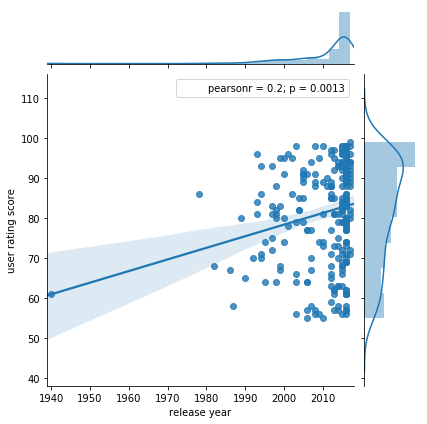

In [9]:
#绘制上映年份和用户评分图表的双变量图
sns.jointplot(data=df, x='release year', y='user rating score',kind = 'reg')
plt.xlim(1939, 2018)

计算出日期年份跨度，通过上映年份和评分的双变量图分析得出  
目标问题1：   
上映年份对于观众评分高低的**关联度很低**，评分散点在各个年份分布都较为平均，没有呈现明显的趋向  
但可以看出，观众们大部分评分都集中在90到100区间，说明此数据集中影视质量较高，并且上映年份在2010年至今的节目占大多数。

In [10]:
print('总共有',df['rating'].nunique(),'个分类，这些分类分别是:',np.sort(df['rating'].unique()))

总共有 13 个分类，这些分类分别是: ['G' 'NR' 'PG' 'PG-13' 'R' 'TV-14' 'TV-G' 'TV-MA' 'TV-PG' 'TV-Y' 'TV-Y7'
 'TV-Y7-FV' 'UR']


Text(0.5,1,'User scores by Rating')

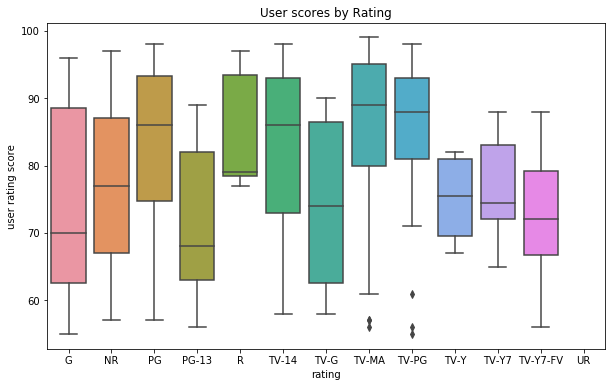

In [11]:
#利用seaborn绘制分级和用户评分的箱线图
plt.figure(figsize = (10,6))
sns.boxplot(data=df, x='rating', y='user rating score',order=np.sort(df['rating'].unique()))
plt.title('User scores by Rating')

通过箱线图可以看出:  
 1.TV-PG和TV-MA出现了异常值，可能有个别极端恶评情况  
 2.R分级和TV-Y7分级评分中位数十分接近下四分位数，说明存在少数评分特别高的评价，表示在该两种级别下可能存在硬核爱好者。  
 3.总的来看，PG、TV-14、TV-MA等级的节目评分普遍较高  

利用Netflix官方对于年龄级别的分组信息：  
**Little Kids: G, TV-Y, TV-G.  
Older Kids: PG, TV-Y7, TV-Y7-FV, TV-PG.  
Teens: PG-13, TV-14.  
Adults: R, NC-17, NR, UR, TV-MA.**  
对于不同分级的节目观众分为4个年龄段

In [12]:
#按年龄阶段对电影级别进行分组
def group_by_age(rating):
    little_kids = ['G','TV-Y','TV-G']
    older_kids = ['PG','TV-Y7','TV-V7-FV','TV-PG']
    teens = ['PG-13','TV-14']
    adults = ['R','NC-17','NR','UR','TV-MA']
        
    if rating in little_kids:
        return 'Little Kids'
    elif rating in older_kids:
        return 'Older Kids'
    elif rating in teens:
        return 'Teens'
    elif rating in adults:
        return 'Adults'
    else:
        return 'Missing'
    
df['group_by_age'] = df['rating'].apply(group_by_age)
df.head(10)

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size,group_by_age
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80,Teens
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82,Adults
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80,Teens
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80,Teens
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80,Older Kids
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80,Teens
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,110,2013,97.0,80,Adults
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2017,91.0,80,Teens
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,110,2015,98.0,80,Adults
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,96.0,80,Teens


Text(0.5,1,'Pie Chart')

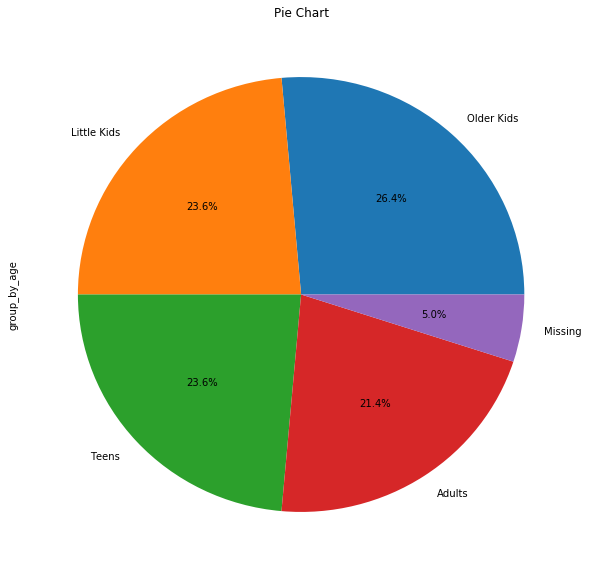

In [13]:
#分别画出饼图和计数直方图
plt.figure(figsize=(10,10))
df.group_by_age.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Pie Chart')

Text(0.5,1,'Count Chart')

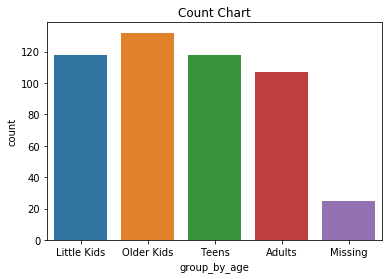

In [14]:
order = ['Little Kids','Older Kids','Teens','Adults','Missing']
sns.countplot(df['group_by_age'],order=order)
plt.title('Count Chart')

通过饼图和计数直方图能够看出4个年龄段的观众比例十分相近  
节目面向观众群体最多的是older kids，最少的是adults

In [16]:
df.groupby(['group_by_age','release year']).count()

title  rating  ratingLevel  ratingDescription  \
group_by_age release year                                                  
Adults       2001              2       2            2                  2   
             2004              1       1            1                  1   
             2006              1       1            1                  1   
             2007              1       1            1                  1   
             2009              1       1            1                  1   
             2010              1       1            1                  1   
             2011              1       1            1                  1   
             2012              2       2            2                  2   
             2013              6       6            6                  6   
             2014              8       8            8                  8   
             2015             11      11           10                 11   
             2016             49      49           38                 49   
             2017             23      23           10                 23   
Little Kids  1940              1       1            1                  1   
             1976              1       1            1                  1   
             1982              1       1            1                  1   
             1986              1       1            1                  1   
             1990              1       1            1                  1   
             1991              1       1            1                  1   
             1992              1       1            1                  1   
             1993              3       3            3                  3   
             1995              1       1            1                  1   
             1997              4       4            4                  4   
             1998              4       4            4                  4   
             1999              3       3            3                  3   
             2000              6       6            6                  6   
             2001              1       1            1                  1   
             2002              3       3            3                  3   
             2003              6       6            6                  6   
             2004              4       4            4                  4   
...                          ...     ...          ...                ...   
Older Kids   2004              1       1            1                  1   
             2005              4       4            4                  4   
             2006              1       1            1                  1   
             2007              4       4            4                  4   
             2008              7       7            7                  7   
             2009              3       3            3                  3   
             2010              3       3            3                  3   
             2011              4       4            4                  4   
             2012              6       6            6                  6   
             2013              7       7            7                  7   
             2014             13      13           13                 13   
             2015             17      17           17                 17   
             2016             28      28           26                 28   
             2017              5       5            5                  5   
Teens        1998              1       1            1                  1   
             1999              1       1            1                  1   
             2001              1       1            1                  1   
             2003              2       2            2                  2   
             2004              1       1            1                  1   
             2005              2       2            2                  2   

Text(0.5,1,'User scores by age_group')

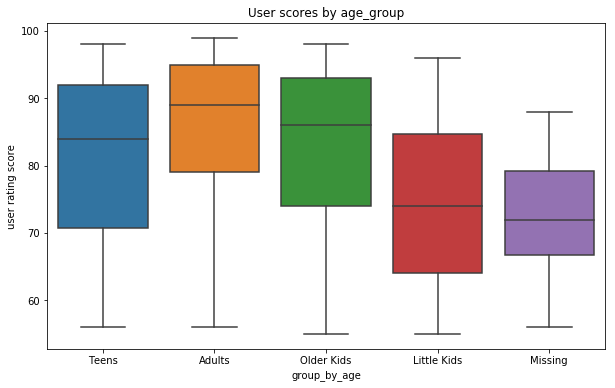

In [27]:
plt.figure(figsize = (10,6))
sns.boxplot(data=df, x='group_by_age', y='user rating score')
plt.title('User scores by age_group')

可以看出adults和teens是贡献评分最多的观众团体，并且他们更倾向为16、17年的节目评分  
评分最少的是little kids年龄段观众
adults观众团体对于节目更容易给出较高的评分

In [19]:
print('按照年龄分级的最高评分和最低评分电影:')

for group in order:
    print('\n' + group+':')
    print('Highest:')
    print(df[df['group_by_age']==group].sort_values('user rating score',ascending=False)[['title','user rating score']].head(1))
    print('\nLowest:')
    print(df[df['group_by_age']==group].sort_values('user rating score')[['title','user rating score']].head(1))

按照年龄分级的最高评分和最低评分电影:

Little Kids:
Highest:
                                      title  user rating score
396  Homeward Bound: The Incredible Journey               96.0

Lowest:
              title  user rating score
399  Curious George               55.0

Older Kids:
Highest:
        title  user rating score
27  The Flash               98.0

Lowest:
               title  user rating score
153  Life Unexpected               55.0

Teens:
Highest:
      title  user rating score
57  Friends               98.0

Lowest:
                            title  user rating score
171  How to Lose a Guy in 10 Days               56.0

Adults:
Highest:
             title  user rating score
41  13 Reasons Why               99.0

Lowest:
      title  user rating score
218  Bitten               56.0

Missing:
Highest:
                         title  user rating score
361  Dragons: Race to the Edge               88.0

Lowest:
            title  user rating score
339  Pok╠⌐mon: XY               56.0


通过上面的数据可以得出：    
对于成年人：最推荐的为13 Reasons Why 最不推荐的是Bitten  
对于青年：最推荐的为Friends 最不推荐的是How to Lose a Guy in 10 Days  
对于少年：最推荐的为The Flash 最不推荐的是Life Unexpected  
对于儿童：最推荐的为Homeward Bound: The Incredible Journey 最不推荐的是Curious George

### 总结 ###
此项目使用pandas库对数据进行了整理和计算，并使用matplotlib库的pyplot模块将数据可视化。通过对数据的计算和对图形的观察，顺利的解决了在项目开始时提出的四个问题,但是对于空缺的数据值没有补齐，直接进行了剔除。  
在所有的分析结论中，数据之间的因果关系或者逻辑关系，仅仅是一种合理推测，并非严格的统计论证。